# Project 3, NLP - 04
### by Joomart Achekeev

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfte = pd.read_csv('../data/text_cvec.csv')

In [3]:
dfti = pd.read_csv('../data/title_cvec.csv')

In [4]:
dfte.head()

,subr,000,06,08,09,09 24,09 25,09 26,0x06,0xc0000142,...,zero,zeroing,zombie,zombie apocalypse,zombies,zone,zones,zoo,zoo tycoon,zoom
0,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sub_dict = {}
for i in range(len(list(dfti['subr'].value_counts().index))):
    sub_dict[sorted(list(dfti['subr'].value_counts().index))[i]] = (i + 1)

In [6]:
sub_dict

{'Battlefield': 1,
 'DestinyTheGame': 2,
 'DnD': 3,
 'EscapefromTarkov': 4,
 'Jokes': 5,
 'MaliciousCompliance': 6,
 'PiratedGames': 7,
 'TwoXChromosomes': 8,
 'explainlikeimfive': 9}

In [7]:
dfti['subr'] = dfti['subr'].map(sub_dict)
dfte['subr'] = dfte['subr'].map(sub_dict)

### Decision Tree

In [8]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
Xti = dfti.drop(columns='subr')
yti = dfti['subr']
Xte = dfte.drop(columns='subr')
yte = dfte['subr']

In [10]:
Xti_train, Xti_test, yti_train, yti_test = train_test_split(Xti, yti, random_state=42)
Xte_train, Xte_test, yte_train, yte_test = train_test_split(Xte, yte, random_state=42)

In [11]:
dtc_ti = DecisionTreeClassifier(random_state=42)
dtc_te = DecisionTreeClassifier(random_state=42)

In [12]:
dtc_ti.fit(Xti_train, yti_train)

DecisionTreeClassifier(random_state=42)

In [13]:
dtc_te.fit(Xte_train, yte_train)

DecisionTreeClassifier(random_state=42)

In [14]:
dtc_ti.score(Xti_train, yti_train), dtc_ti.score(Xti_test, yti_test)

(0.9802646085997795, 0.5499338624338624)

In [15]:
dtc_te.score(Xte_train, yte_train), dtc_te.score(Xte_test, yte_test)

(0.9889746416758545, 0.5876322751322751)

In [16]:
cross_val_score(dtc_ti, Xti_train, yti_train).mean()

0.5398015435501653

In [17]:
cross_val_score(dtc_te, Xte_train, yte_train).mean()

0.5715545755237045

at this stage the model has extreamly high variance. But the subreddit post text score is noticably higher than the subreddit post title score. Unfortunately GridSearchCV took forever to run even with few hyperparrameters tweaked(believe me, i spend couple of hours just on that grid search).

In [119]:
dtc_preds_ti = dtc_ti.predict(Xti_test)

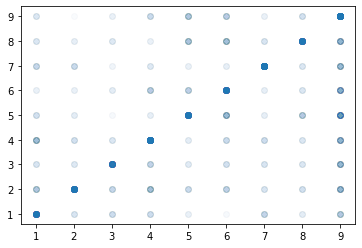

In [118]:
plt.scatter(dtc_preds_ti, yti_test, alpha=0.01);

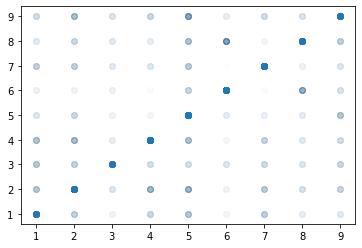

In [120]:
dtc_preds_te = dtc_te.predict(Xte_test)
plt.scatter(dtc_preds_te, yte_test, alpha=0.01);

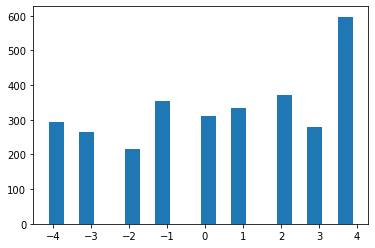

In [127]:
plt.hist(dtc_preds_ti - yti_test.mean(), bins=20);

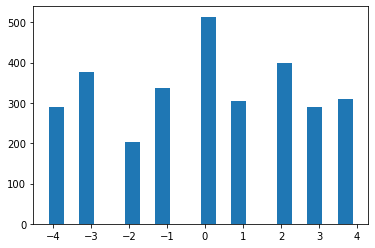

In [128]:
plt.hist(dtc_preds_te - yte_test.mean(), bins=20);

### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_ti = KNeighborsClassifier()
knn_te = KNeighborsClassifier()

In [20]:
knn_ti.fit(Xti_train, yti_train)
knn_te.fit(Xte_train, yte_train)

KNeighborsClassifier()

In [21]:
knn_ti.score(Xti_train, yti_train), knn_ti.score(Xti_test, yti_test)

(0.6067254685777288, 0.3776455026455027)

In [22]:
knn_te.score(Xte_train, yte_train), knn_te.score(Xte_test, yte_test)

(0.4637265711135612, 0.3244047619047619)

In [133]:
cross_val_score(knn_te, Xte_train, yte_train).mean()

0.3137816979051819

In [134]:
cross_val_score(knn_ti, Xti_train, yti_train).mean()

0.35556780595369347

KNN scores are even lower than those of decision tree model's. However, in this model title scores are higher than text scores.

#### KNN grid search

In [23]:
params = {
    'n_neighbors': [3,5,7],
    'weights': ['uniform', 'distance']
}

In [26]:
knn_grid_ti = GridSearchCV(KNeighborsClassifier(), param_grid=params)
knn_grid_te = GridSearchCV(KNeighborsClassifier(), param_grid=params)

In [27]:
knn_grid_ti.fit(Xti_train, yti_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [28]:
knn_grid_te.fit(Xte_train, yte_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [31]:
knn_grid_ti.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [33]:
knn_grid_te.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [34]:
knn_grid_ti.best_score_

0.40606394707828003

In [35]:
knn_grid_te.best_score_

0.33142227122381474

### Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier

In [41]:
bag_ti = BaggingClassifier(random_state=42)
bag_te = BaggingClassifier(random_state=42)

In [42]:
bag_ti.fit(Xti_train, yti_train)

BaggingClassifier(random_state=42)

In [43]:
bag_te.fit(Xte_train, yte_train)

BaggingClassifier(random_state=42)

In [44]:
bag_ti.score(Xti_train, yti_train), bag_ti.score(Xti_test, yti_test)

(0.9613009922822492, 0.5674603174603174)

In [45]:
bag_te.score(Xte_train, yte_train), bag_te.score(Xte_test, yte_test)

(0.9742006615214994, 0.6276455026455027)

In [132]:
cross_val_score(bag_te, Xte_train, yte_train).mean(), cross_val_score(bag_ti, Xti_train, yti_train).mean()

(0.6213891951488424, 0.5552370452039691)

Bagging scores yielded high varriance, and again text scores are higher than title scores. This is the best model yet.

### Stacking

For stacking not only the three models will be used but also data from text and title of the subreddit posts, because data from two different datasets (text and title) are used, will do stacking by hand

In [148]:
X_pred_train_ti = pd.DataFrame()
X_pred_train_ti['dtc_ti'] = cross_val_predict(dtc_ti, Xti_train, yti_train)
X_pred_train_ti['knn_ti'] = cross_val_predict(knn_ti, Xti_train, yti_train)
X_pred_train_ti['bag_ti'] = cross_val_predict(bag_ti, Xti_train, yti_train)
X_pred_train_ti.head()

,dtc_ti,knn_ti,bag_ti
0,5,6,5
1,9,9,9
2,6,1,6
3,3,2,3
4,9,1,9


In [149]:
X_pred_test_ti = pd.DataFrame()
X_pred_test_ti['dtc_ti'] = cross_val_predict(dtc_ti, Xti_test, yti_test)
X_pred_test_ti['knn_ti'] = cross_val_predict(knn_ti, Xti_test, yti_test)
X_pred_test_ti['bag_ti'] = cross_val_predict(bag_ti, Xti_test, yti_test)
X_pred_test_ti.head()

,dtc_ti,knn_ti,bag_ti
0,9,9,9
1,9,9,9
2,1,1,1
3,5,9,5
4,8,9,8


In [150]:
X_pred_train_te = pd.DataFrame()
X_pred_train_te['dtc_te'] = cross_val_predict(dtc_te, Xte_train, yte_train)
X_pred_train_te['knn_te'] = cross_val_predict(knn_te, Xte_train, yte_train)
X_pred_train_te['bag_te'] = cross_val_predict(bag_te, Xte_train, yte_train)
X_pred_train_te.head()

,dtc_te,knn_te,bag_te
0,6,8,8
1,6,6,6
2,6,5,5
3,7,7,7
4,1,5,2


In [151]:
X_pred_test_te = pd.DataFrame()
X_pred_test_te['dtc_te'] = cross_val_predict(dtc_te, Xte_test, yte_test)
X_pred_test_te['knn_te'] = cross_val_predict(knn_te, Xte_test, yte_test)
X_pred_test_te['bag_te'] = cross_val_predict(bag_te, Xte_test, yte_test)
X_pred_test_te.head()

,dtc_te,knn_te,bag_te
0,1,5,7
1,9,5,9
2,1,1,1
3,5,4,5
4,6,6,6


In [48]:
from sklearn.linear_model import LinearRegression

In [152]:
# joining the title and text data
train_df = pd.concat([X_pred_train_ti, X_pred_train_te], axis=1)
test_df = pd.concat([X_pred_test_ti, X_pred_test_te], axis=1)

In [153]:
train_df.head()

,dtc_ti,knn_ti,bag_ti,dtc_te,knn_te,bag_te
0,5,6,5,6,8,8
1,9,9,9,6,6,6
2,6,1,6,6,5,5
3,3,2,3,7,7,7
4,9,1,9,1,5,2


In [154]:
y_train = pd.concat([yti_train, yte_train], axis=1)

In [155]:
y_test = pd.concat([yti_test, yte_test], axis=1)

In [139]:
test_df.head()

,dtc_ti,knn_ti,bag_ti,dtc_te,knn_te,bag_te
0,1,1,1,1,5,1
1,9,9,9,9,9,9
2,1,1,1,1,1,1
3,6,7,6,3,4,5
4,1,4,1,6,6,6


In [140]:
y_train

,subr,subr
10271,8,8
7452,6,6
3528,3,3
1822,2,2
7034,6,6
...,...,...
11964,9,9
5191,5,5
5390,5,5
860,1,1


In [156]:
import numpy as np
#joining the y's and finding the means, in case there are 
#two different numbers the function will fill as None
y_train = pd.DataFrame([int(i) if i%1==0 else np.nan for i in y_train.mean(axis=1)], index=yti_train.index)
y_test = pd.DataFrame([int(i) if i%1==0 else np.nan for i in y_test.mean(axis=1)], index=yti_test.index)

In [91]:
y_train.isna().sum()

0    0
dtype: int64

In [92]:
y_test.isna().sum()

0    0
dtype: int64

In [158]:
lr = LinearRegression()
lr.fit(train_df, y_train)

LinearRegression()

In [159]:
lr.score(train_df, y_train)

0.46929457431408395

In [160]:
lr.score(test_df, y_test)

0.38929260499059204

In [161]:
cross_val_score(lr, train_df, y_train).mean()

0.46774932201534014

In [98]:
preds = lr.predict(test_df)

In [100]:
preds

array([[0.98568202],
       [9.00137274],
       [1.00406327],
       ...,
       [4.00387621],
       [4.00305432],
       [5.49988118]])

In [165]:
residuals = preds - int(y_test.mean())

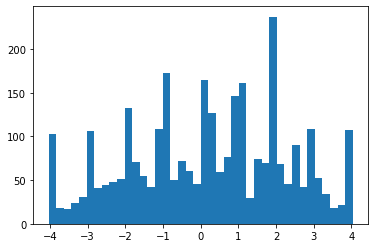

In [168]:
plt.hist(residuals, bins=40);

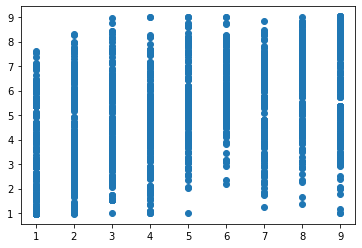

In [169]:
plt.scatter(y_test, preds)

### Conclusion

Due to 9 subreddit topics used in this project the highest cross_valid_score returned by a model is \~62 returned by bagging model. Which is still much higher then the baseline guessing model of 1/9 (~11.11%) 